# CS的配置,详情都在 Cobalt strike.doc文件夹
1. 放到Linux文件夹中,比如放入mnt文件夹
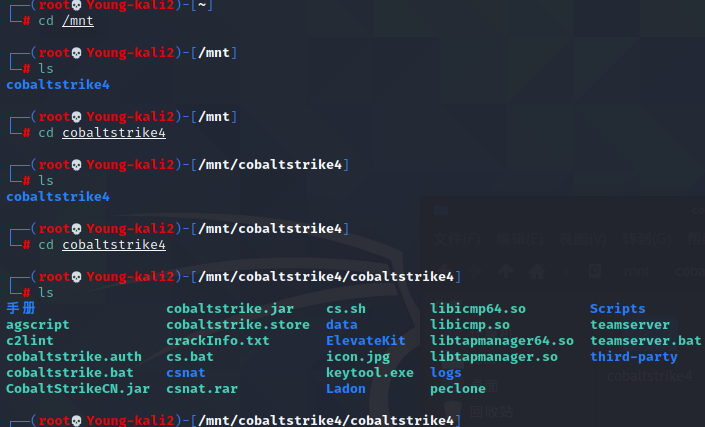
2. 客户端为cs.bat 服务端为teamserver 先启动服务端 ./teamserver 192.168.248.132 test ,  
    ./ 代表运行当前路径下的文件,192.168.248.132 是本虚拟机kail的ip,test是密码,  
    如果运行报错可能需要提权chmod 777 ./teamserver  
    运行成功入下图,默认端口50050,需要修改,因为默认端口都被WAF拦截了,服务端端口修改直接改teamserver文件,  
    里面除了端口还有指纹信息之类的,为了过WAF,也是需要更改的
    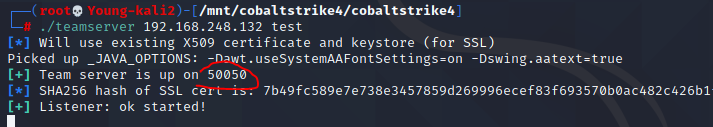
    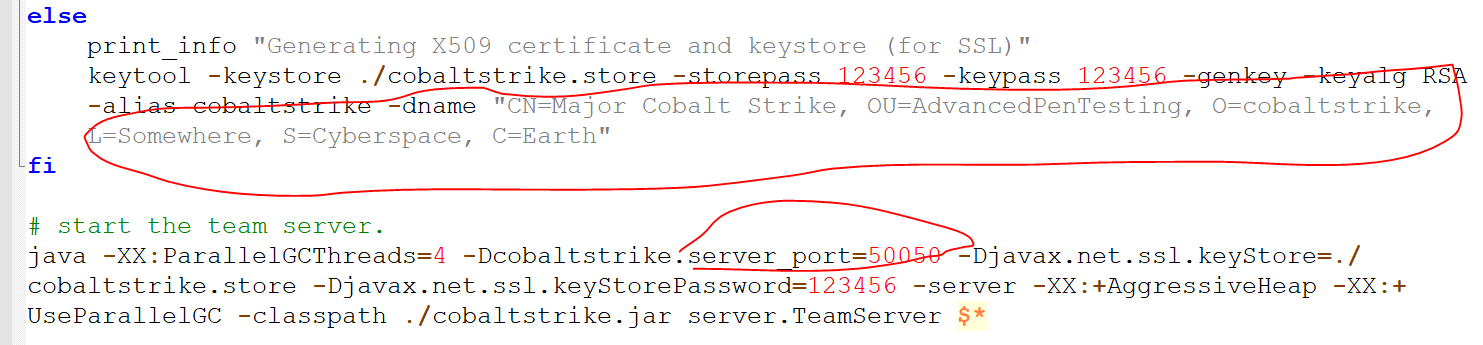
    然后在物理机启动客户端cs.bat,输入linux服务器的ip和密码,用户名随便输
    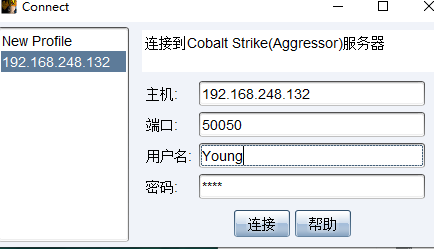
    如果客户端 是Linux操作系统则运行以下命令，启动客户端：
    ```java -Dfile.encoding=UTF-8 -javaagent:CobaltStrikeCN.jar -XX:ParallelGCThreads=4 -XX:+AggressiveHeap -XX:+UseParallelGC -jar cobaltstrike.jar```  
    


# cs监听器的配置和使用
### 创建监听器
1. 点击 Cobalt Strike -> Listeners->Add，其中内置了八个Payload，
    wndows/beacon_dns/reverse_dns_txt
    windows/beacon_http/reverse_http
    windows/beacon_https/reverse_https
    windows/beacon_bind_pipe
    windows/beacon_tcp
    windows/beacon_extc2
    windows/foreign/reverse_http
    windows/foreign/reverse_https
    1 2 7 8 几个反向监听是常用的马
    监听端口随便写个,配置图片如下
    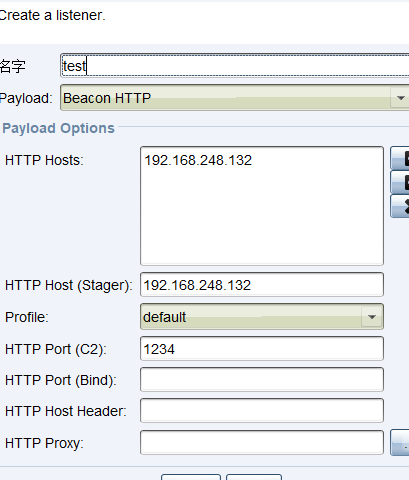

2. 生成木马,攻击-生成后门-windows executable,32位和64均可
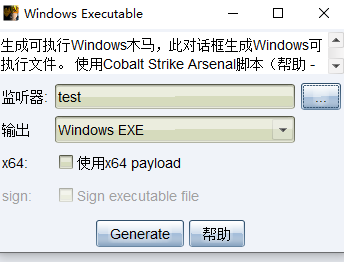

## CS和MSF一起混合搭配 (因为笔记本性能问题,实验均为测试过)

1. msfconsole开启,选择一个payload ```use exploit/multi/hander```,然后set payload lhost(msf机子的ip)和端口,可以show options看下配置后的数据后用run -j运行
2. cs客户端开启一个新的监听器,监听这个端口和ip,然后右键派生会话session,选中MSF中ip和端口的监听器,这里有可能新的监听在MSF无法产生会话,协议的payload需要选为Foreign HTTP,或者会话下面restart试试.
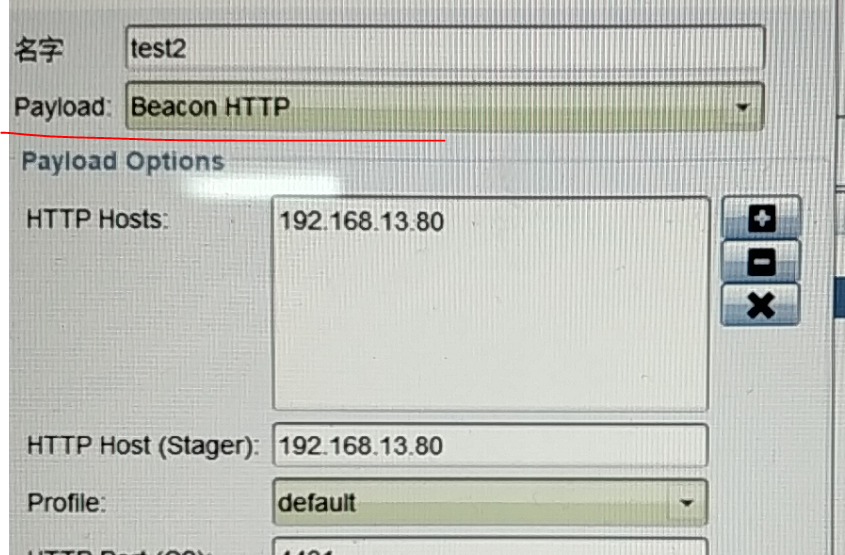
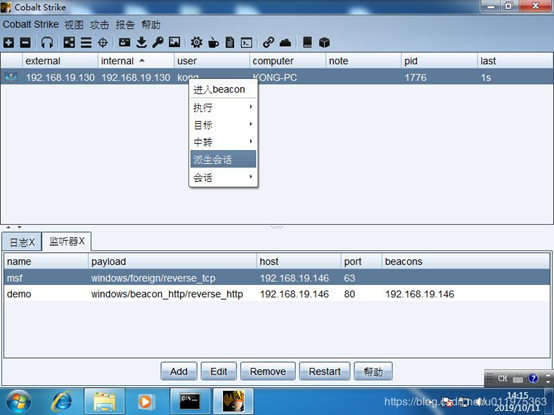
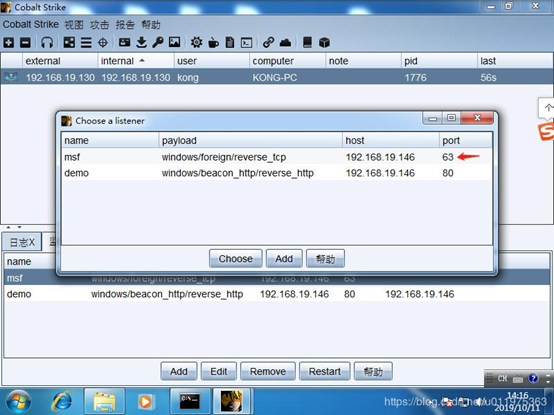
3. msf中看是否顺利的建立会话.建立显示如下
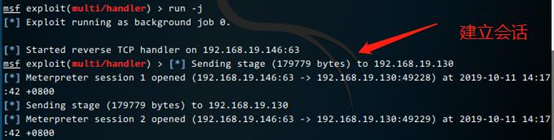
4. 会话有看以后用session -i 序列号 使用会话

## cs payload在office宏的应用
1. 生成宏 payload
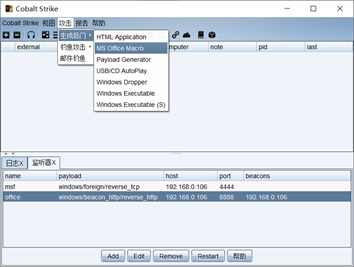
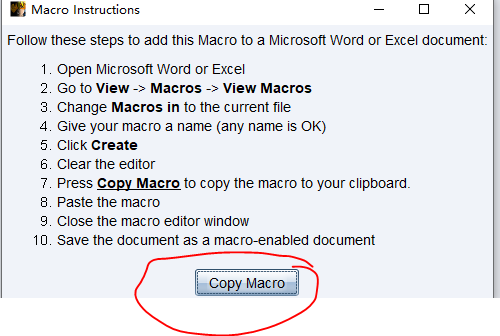
2. 粘贴到宏里保存即可
3. 做试验的时候，宏的位置不要设置所有的活动模板和文档，建设应用在当前文档，不然本机所有word文档运行都会种上你的木马，另外打开word文档有宏提示，一般是word默认禁用所有宏（文件—选项—信任中心—信任中心设置里面配置）。

# Https Payload应用

优点：可能过行为查杀、另外administrator运行可直接提升为system权限  
1. 生成payload
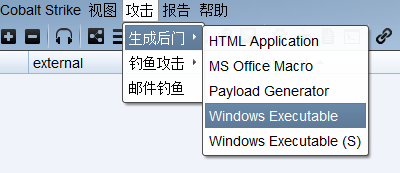
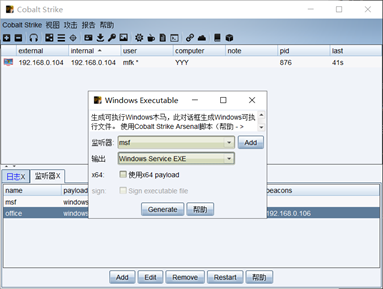  
2.创建服务  
比如跑到windows/system32下执行下面,下面路径也改下到system32,这样设置的随机自启动,容易过查杀.  
```
Sc create test binpath= ”c:\test.exe” start= auto displayname= ”test”
Sc start test
Sc delete test
Sc top test
```

## 信息收集,用来点击后重定向到挂马的网站
1. 生成payload
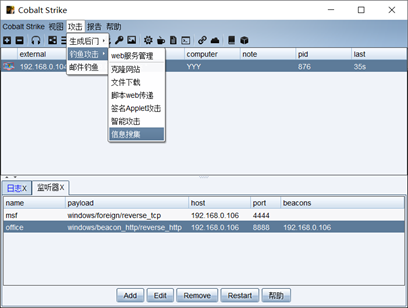
2. 填写重定向网站,复制网址可以通过https://bitly.com 生成url短链接,肉鸡双击链接即上线  
http://tool.chinaz.com/tools/dwz.aspx

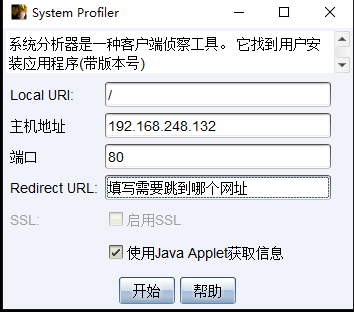
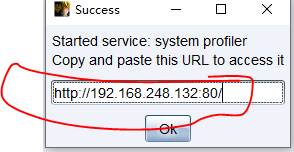
3. 在web管理服务里进行删除不需要的payload

## hta网页挂马
HTA是HTML Application的缩写（HTML应用程序），是软件开发的新概念，直接将HTML保存成HTA的格式，就是一个独立的应用软件，与VB、C++等程序语言所设计的软件界面没什么差别。
1. 第一步：生成hta
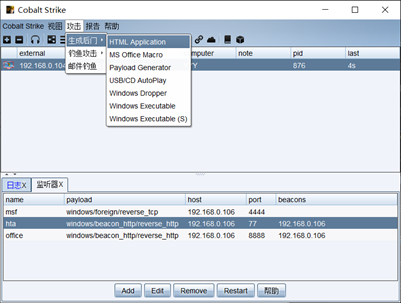
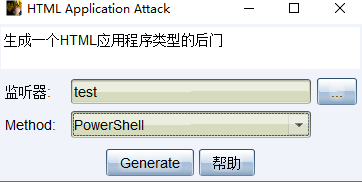
文件生成后会传到在服务器根目录里的/uploads/里
2. 使用文件下载
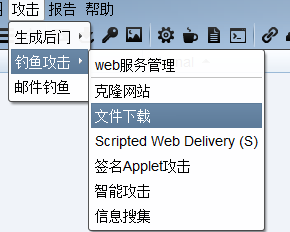
Local url配置文件下载路径
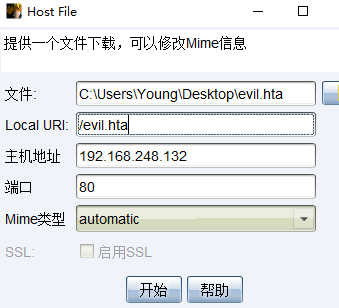
3. 生成克隆网站
需要填写克隆的网址以及绑定之前生成的hta文件,键盘记录功能看自己需求,如果之前生成过一样的克隆网站,需要先去web服务管理删除,否则会报错
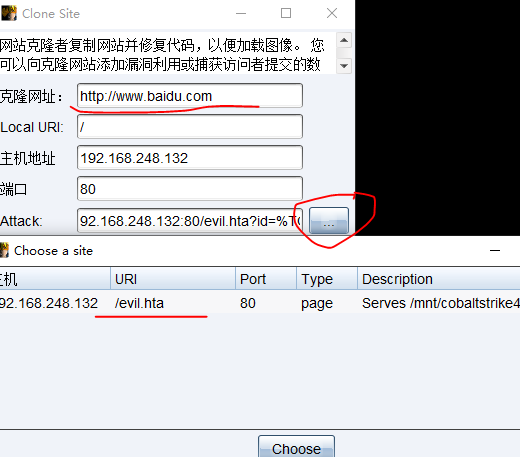
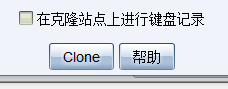
4. 复制生成的链接,最好经过短链接处理下发出去钓鱼,如果勾选了键盘记录,去web日志里看
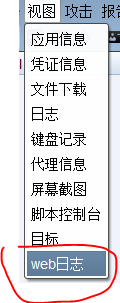

# 邮件钓鱼
1. 生成payload
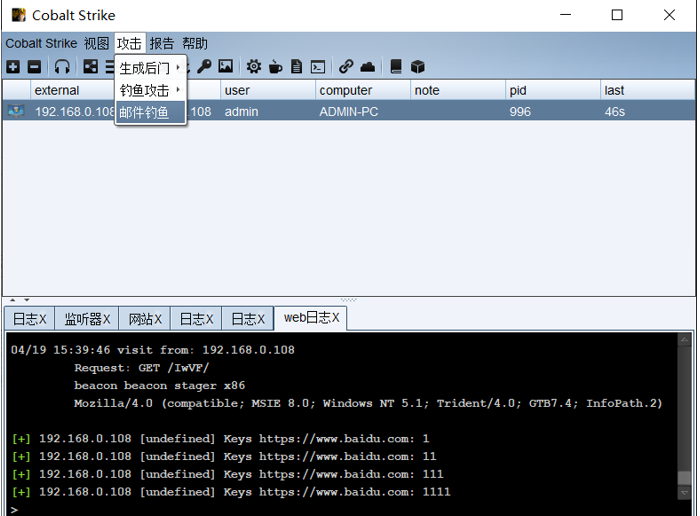
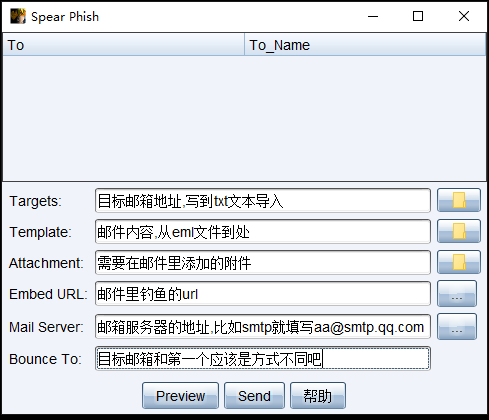

2. pauload里的template就是这么设置,去除收发人和日期
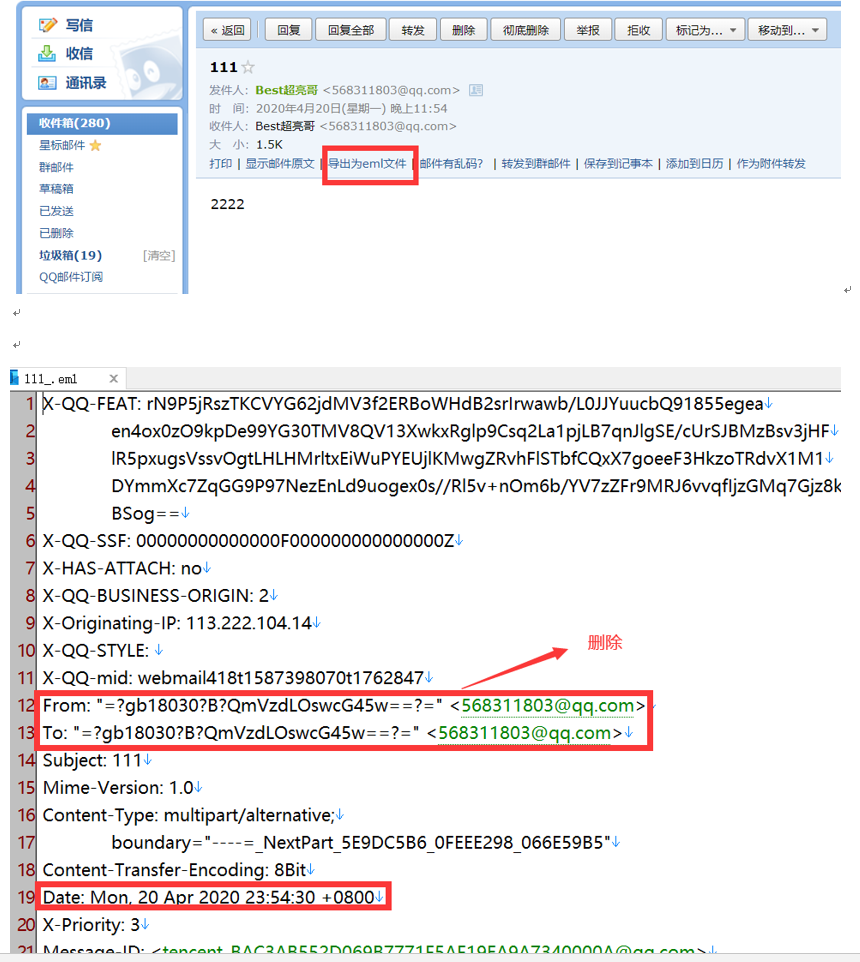

3. 填写示例
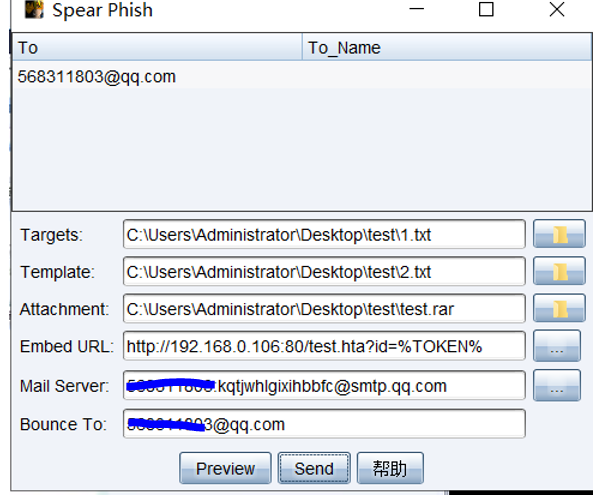